In [1]:
import numpy as np
import pandas as pd
import math
import statistics as stats
import matplotlib.pyplot as plt
from scipy.stats import norm

### Estatística Descritiva

Parte 1 <br>
Análise do tipo de cada variável (com gráficos)

Análise sobre dados anômalos (os outliers) <br>
Manter os dados ou descartá-los?

### Probabilidade e Inferência

Parte 2 <br>
Iremos testar se os nossos dados pertencem a uma distribuição exponencial, normal, lognormal ou gamma.

In [2]:
np_array = np.load('values_squad3.npy')
df_base = pd.DataFrame(np_array, columns=['valores'])

In [3]:
mean_ = float(np.mean(df_base,axis=0))
std_ = float(np.std(df_base,axis=0))
IC1 = mean_ + std_
IC2 = mean_ - std_

print('Para um intervalo de confiança de 68% nossos valores estariam entre {}{} e {}{} com uma média de{}{}{}.'.format('\033[91m', round(IC1,4), round(IC2,4),'\033[0m', '\033[1m', round(mean_,7),'\033[0m'))
print('Para um intervalo de confiança de 95% nossos valores estariam entre {}{} e {}{} com uma média de{}{}{}.'.format('\033[91m', round(IC1+std_,4), round(IC2-std_,4),'\033[0m', '\033[1m', round(mean_,7),'\033[0m'))
print('Para um intervalo de confiança de 99.7% nossos valores estariam entre {}{} e {}{} com uma média de{}{}{}.'.format('\033[91m', round(IC1+2*std_,4), round(IC2-2*std_,4),'\033[0m','\033[1m', round(mean_,7),'\033[0m'))


Para um intervalo de confiança de 68% nossos valores estariam entre 0.0996 e -0.0996 com uma média de-8.4e-06.
Para um intervalo de confiança de 95% nossos valores estariam entre 0.1992 e -0.1992 com uma média de-8.4e-06.
Para um intervalo de confiança de 99.7% nossos valores estariam entre 0.2988 e -0.2988 com uma média de-8.4e-06.


In [4]:
def agrupamento(np_array, step, sort_array= False):
    if sort_array == True:
        np_array = np.sort(np_array)
    lista_media_aleatoria = []
    for i in range(step,len(np_array)+1, step):
        agrupamento = np_array[i-step:i]
        media_agrupamentos = np.mean(agrupamento)
        lista_media_aleatoria.append(media_agrupamentos)

    return pd.DataFrame(lista_media_aleatoria, columns=['médias agrupamento'])

In [5]:
#analisando os dados em ordem crescente
df_lista_media_sorted = agrupamento(np_array, 1, True)

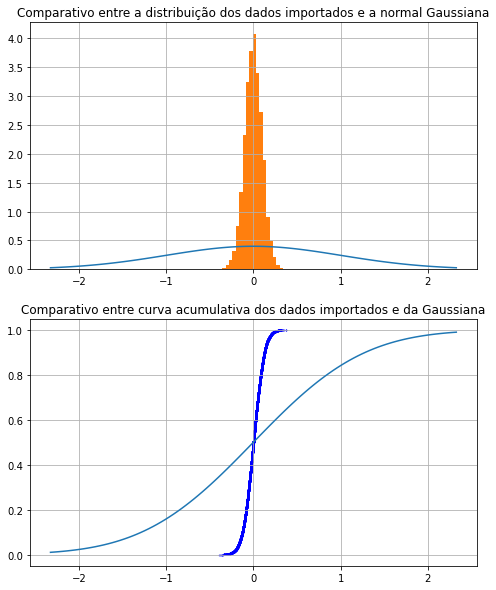

In [6]:
normal_variable = norm()
normal_values = normal_variable.rvs(size=100000)
x = np.linspace(normal_variable.ppf(0.01), normal_variable.ppf(0.99), 100)

fig, (axs1,axs2) = plt.subplots(2,1, figsize=(8,10))
axs1.plot(x, normal_variable.pdf(x))
axs1.hist(df_base, density=True, bins=20)
axs2.scatter(df_lista_media_sorted,df_lista_media_sorted.index/len(df_lista_media_sorted), s=0.5, c='b');
axs2.plot(x, normal_variable.cdf(x));
axs1.grid()
axs2.grid()
axs1.set_title('Comparativo entre a distribuição dos dados importados e a normal Gaussiana')
axs2.set_title('Comparativo entre curva acumulativa dos dados importados e da Gaussiana');
#leptocúrtica simétrica

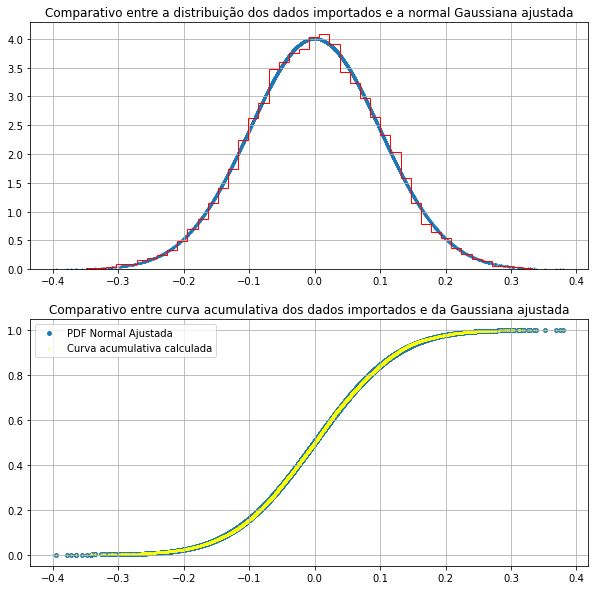

In [7]:
fig, (axs2,axs1) = plt.subplots(2,1, figsize=(10,10))
axs1.scatter(np_array, norm.cdf(np_array, loc = mean_, scale=std_), s=15); # cumulative density function
axs1.scatter(df_lista_media_sorted,df_lista_media_sorted.index/len(df_lista_media_sorted), s=1, c='yellow')
axs2.scatter(np_array, norm.pdf(np_array, loc = mean_, scale=std_), s=1); # probability density function
axs2.hist(df_lista_media_sorted, density=True, bins=50, histtype='step', color='red')
axs1.grid()
axs2.grid()
axs1.set_title('Comparativo entre curva acumulativa dos dados importados e da Gaussiana ajustada')
axs2.set_title('Comparativo entre a distribuição dos dados importados e a normal Gaussiana ajustada')
axs1.legend(['PDF Normal Ajustada', 'Curva acumulativa calculada']);


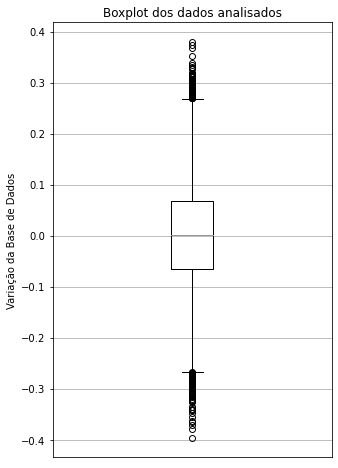

In [8]:
plt.figure(figsize=(5,8))
plt.boxplot(np_array)
plt.xlabel('')
plt.title('Boxplot dos dados analisados')
plt.ylabel('Variação da Base de Dados');
plt.xticks([])
plt.grid()

In [9]:
df_base.describe()

,valores
count,20000.000000
mean,-0.000008
std,0.099599
min,-0.395677
25%,-0.066225
50%,0.000454
75%,0.067889
max,0.379186


In [10]:
#analisando os dados em ordem aleatória
df_lista_media_aleatoria1 = agrupamento(np_array,4) 
df_lista_media_aleatoria2 = agrupamento(np_array,16) 
df_lista_media_aleatoria3 = agrupamento(np_array,64) 

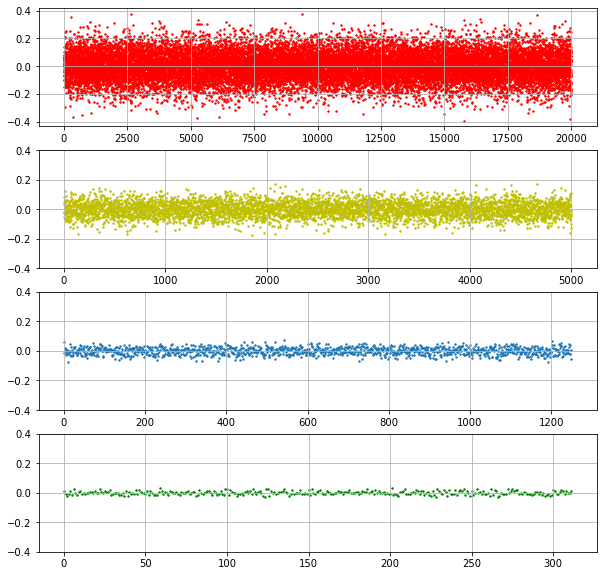

In [11]:
fig, (axs1,axs2,axs3,axs4) = plt.subplots(4,1, figsize=(10,10))
axs1.scatter(df_base.index, df_base, s=2, c='r')
axs2.scatter(df_lista_media_aleatoria1.index, df_lista_media_aleatoria1.values, s=2,c='y')
axs3.scatter(df_lista_media_aleatoria2.index, df_lista_media_aleatoria2.values, s=2)
axs4.scatter(df_lista_media_aleatoria3.index, df_lista_media_aleatoria3.values, s=2, c='g')
axs2.set_ylim(-0.4,0.4)
axs3.set_ylim(-0.4,0.4)
axs4.set_ylim(-0.4,0.4);
axs1.grid()
axs2.grid()
axs3.grid()
axs4.grid()

In [12]:
def forecast_constant(loc, n, scale=1.0):
  return loc + np.random.normal(loc, scale, n)

In [13]:
X_forecast = [] 
np_forecast = np.array(forecast_constant(mean_, len(df_base), std_ ))
df_forecast = pd.DataFrame(np_forecast.T)
mean_tests = np.mean(np_forecast,axis=0)
std_tests = np.std(np_forecast,axis=0)

conf_tests = 1.96*std_/np.sqrt(1000)

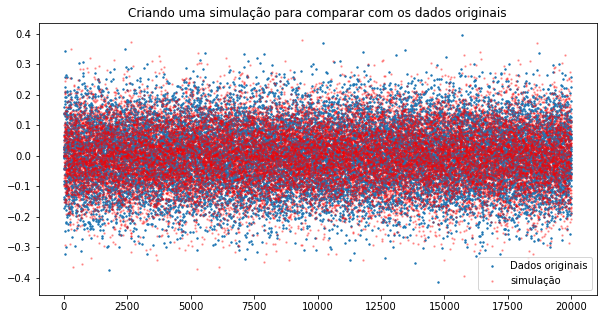

In [14]:
plt.figure(figsize=(10,5))
plt.scatter(df_forecast.index, df_forecast, s=2)
plt.scatter(df_base.index, df_base, s=2, c='r', alpha= 0.3)
plt.title('Criando uma simulação para comparar com os dados originais')
plt.legend(['Dados originais','simulação']);

In [15]:
X_forecast = [] 
for i in range(1000):
  X_forecast.append(forecast_constant(mean_, len(df_base), std_ ))

np_forecast = np.array(X_forecast)
df_forecast = pd.DataFrame(np_forecast.T)
mean_tests = np.mean(np_forecast,axis=0)
std_tests = np.std(np_forecast,axis=0)

conf_tests = 1.96*std_/np.sqrt(1000)

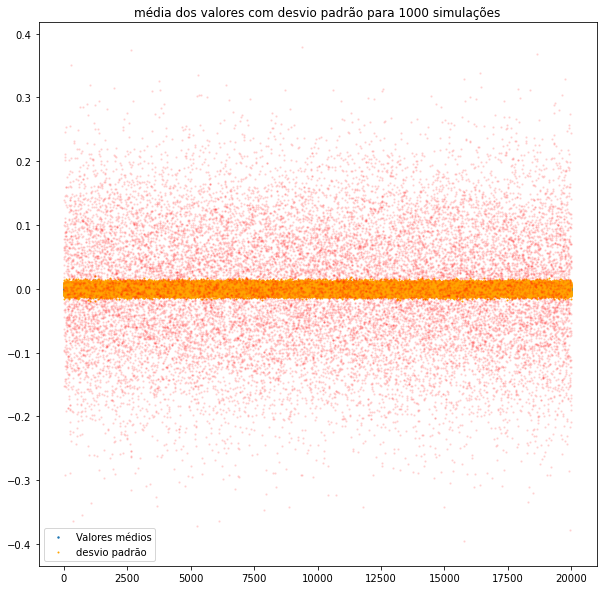

In [16]:
plt.figure(figsize=(10,10))
plt.scatter(pd.DataFrame(mean_tests).index, mean_tests, s= 2) 
plt.scatter(pd.DataFrame(mean_tests).index, mean_tests + conf_tests, s=1,color='orange') 
plt.scatter(pd.DataFrame(mean_tests).index, mean_tests - conf_tests, s=1,color='orange');
plt.scatter(df_base.index, df_base, s=2, c='r', alpha=0.1)
plt.title('média dos valores com desvio padrão para 1000 simulações');
plt.legend(['Valores médios','desvio padrão']);

a) Para cada uma das distribuições, pesquise um estimador para o parâmetro θ. Em seguida,
escreva um código para a estimação desses parâmetros.

b) Faça o teste do qui-quadrado para verificar qual distribuição teórica mais se assemelha à
distribuição dos dados. Não esqueça de montar o teste de hipótese.

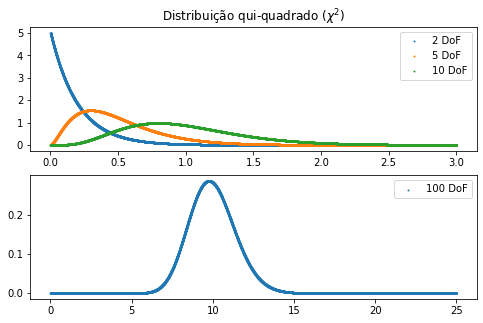

In [17]:
from scipy.stats import chi2
x = np.linspace(0, 3,10000)
y = np.linspace(0, 25,10000)
fig, (axs1, axs2) = plt.subplots(2,1, figsize=(8,5))

axs1.scatter(x, chi2.pdf(x, df=2, loc= mean_, scale=std_), s=1)
axs1.scatter(x, chi2.pdf(x, df=5,loc= mean_, scale=std_), s=1)
axs1.scatter(x, chi2.pdf(x, df=10,loc= mean_, scale=std_), s=1)
axs2.scatter(y, chi2.pdf(y, df=100,loc= mean_, scale=std_), s=1)
axs1.set_title('Distribuição qui-quadrado $(\chi^2)$')
axs1.legend(['2 DoF', '5 DoF', '10 DoF'])
axs2.legend(['100 DoF']);

In [18]:
conf_int_2 = chi2.interval(0.95,df=2,loc= mean_, scale=std_)
conf_int_5 = chi2.interval(0.95,df=5,loc= mean_, scale=std_)
conf_int_10 = chi2.interval(0.95,df=10,loc= mean_, scale=std_)
conf_int_100 = chi2.interval(0.95,df=100,loc= mean_, scale=std_)
print(conf_int_2,'\n', conf_int_5, '\n', conf_int_10, '\n', conf_int_100)

(0.005034755638101604, 0.7347935435402503) 
 (0.08277770755704811, 1.2780690616167574) 
 (0.3233800381840111, 2.0400526331083113) 
 (7.392265717250285, 12.903885595448553)


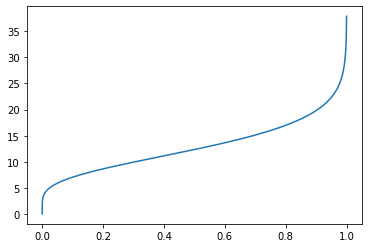

In [23]:
plt.plot(x,chi2.ppf(x, df=13)) # --> Percent point function

#### Questão 3
Séries Temporais

Mostre graficamente o comportamento da série temporal. Realce os valores extremos
(mínimo e máximo). Existem registros atípicos?

Quais são os componentes da série temporal? Analise tais componentes e plote os
gráficos.

Os resíduos da série seguem uma distribuição normal?